In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ecommerceDataset.csv',header=None)
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
df.columns=['label','Text']

In [4]:
df.head()

,label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [5]:
df.shape

(50425, 2)

In [6]:
df.label.value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [7]:
df_clothing=df[df['label']=='Clothing & Accessories']
df_electronics=df[df['label']=='Electronics']
df_books=df[df['label']=='Books']
df_household=df[df['label']=='Household']

In [8]:
df_electronics_n=df_electronics.sample(df_clothing.shape[0])
df_books_n=df_books.sample(df_clothing.shape[0])
df_household_n=df_household.sample(df_clothing.shape[0])

In [9]:
df_balanced=pd.concat([df_clothing,df_electronics_n,df_books_n,df_household_n])

In [10]:
df_balanced.head()

,label,Text
31133,Clothing & Accessories,Woopower 36M Pink for 024M Baby Trouser Top Se...
31134,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...
31135,Clothing & Accessories,Vaenait Baby 024M Baby Girls Rashguard Swimwea...
31136,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...
31137,Clothing & Accessories,Kuchipoo Girl's Cotton Regular Fit T-Shirt - P...


In [11]:
df_balanced['label'].value_counts()

label
Clothing & Accessories    8671
Electronics               8671
Books                     8671
Household                 8671
Name: count, dtype: int64

In [12]:
df_balanced.shape

(34684, 2)

In [13]:
df_balanced['label_num']=df.label.map({
    'Books':0,
    'Clothing & Accessories':1,
    'Electronics':2,
    'Household':3
})

In [14]:
df_balanced.head()

,label,Text,label_num
31133,Clothing & Accessories,Woopower 36M Pink for 024M Baby Trouser Top Se...,1
31134,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1
31135,Clothing & Accessories,Vaenait Baby 024M Baby Girls Rashguard Swimwea...,1
31136,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1
31137,Clothing & Accessories,Kuchipoo Girl's Cotton Regular Fit T-Shirt - P...,1


In [15]:
df_balanced['Text']=df_balanced['Text'].apply(lambda x:np.str_(x))

In [16]:
df_balanced

,label,Text,label_num
31133,Clothing & Accessories,Woopower 36M Pink for 024M Baby Trouser Top Se...,1
31134,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1
31135,Clothing & Accessories,Vaenait Baby 024M Baby Girls Rashguard Swimwea...,1
31136,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1
31137,Clothing & Accessories,Kuchipoo Girl's Cotton Regular Fit T-Shirt - P...,1
...,...,...,...
1755,Household,Mamta Decoration Sheesham Wood Foldable Patio ...,3
15264,Household,OCIAL Plastic 220-240V 50 HZ 1000W Blowing and...,3
2735,Household,"tecmac MTW154Q Travel Footrest For Airplane, P...",3
6362,Household,PINDIA Heart Polyester Windows Thread Curtain ...,3


In [17]:
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Text'],df_balanced['label_num'],test_size=0.2,random_state=101,
                                              stratify=df_balanced['label_num'],shuffle=True)

In [18]:
X_train.shape

(27747,)

In [19]:
X_test.shape

(6937,)

In [20]:
y_train.value_counts()

label_num
2    6937
1    6937
0    6937
3    6936
Name: count, dtype: int64

In [21]:
y_test.value_counts()

label_num
3    1735
0    1734
1    1734
2    1734
Name: count, dtype: int64

In [22]:
clf=Pipeline([
    ('tfidf_vectorizer',TfidfVectorizer()),
    ('knn',KNeighborsClassifier())
])

In [23]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('knn', KNeighborsClassifier())])

In [24]:
y_pred=clf.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1734
           1       0.97      0.98      0.98      1734
           2       0.96      0.95      0.96      1734
           3       0.95      0.95      0.95      1735

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



In [27]:
X_test[:5]

26522                           Bank Financial Management 
11415    MK 1 Pc Cute Nontoxic Plastic Training Chopsti...
2891     Pigeon Consta Cool 12627 15-Litre Air Cooler (...
13808    Morphy Richards InstaCook 1200-Watt Electric K...
18169    Univocean Modern Brick Wall 3D Wall Poster, Wa...
Name: Text, dtype: object

In [28]:
y_test[:5]

26522    0
11415    3
2891     3
13808    3
18169    3
Name: label_num, dtype: int64

In [29]:
y_pred[:5]

array([0, 1, 3, 3, 3], dtype=int64)

In [31]:
clf2=Pipeline([
    ('tfidf_vectorizer',TfidfVectorizer()),
    ('Multinomial_NB',MultinomialNB())
])

In [32]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('Multinomial_NB', MultinomialNB())])

In [33]:
y_pred2=clf2.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1734
           1       0.97      0.98      0.97      1734
           2       0.95      0.95      0.95      1734
           3       0.92      0.95      0.93      1735

    accuracy                           0.95      6937
   macro avg       0.95      0.95      0.95      6937
weighted avg       0.95      0.95      0.95      6937



In [36]:
clf3=Pipeline([
    ('tfidf_vectorizer',TfidfVectorizer()),
    ('rfc',RandomForestClassifier())
])

In [37]:
clf3.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

In [39]:
y_pred3=clf3.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1734
           1       0.98      0.98      0.98      1734
           2       0.98      0.96      0.97      1734
           3       0.94      0.95      0.94      1735

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



In [45]:
sw=stopwords.words('english')

In [48]:
lemmatizer=WordNetLemmatizer()

In [49]:
def text_preprocessing(text):
    text=text.lower()
    text=re.sub('[^a-z]',' ',text)
    text=re.sub('\s+[a-z]\s+',' ',text)
    text=re.sub('\s+',' ',text)
    words=[word for word in text.split() if word not in sw]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [50]:
df_balanced['Text_preprocessed']=df_balanced['Text'].apply(text_preprocessing)

In [51]:
df_balanced.head()

,label,Text,label_num,Text_preprocessed
31133,Clothing & Accessories,Woopower 36M Pink for 024M Baby Trouser Top Se...,1,woopower pink baby trouser top set pc boy girl...
31134,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1,amour butterfly design sunglass girl year sku ...
31135,Clothing & Accessories,Vaenait Baby 024M Baby Girls Rashguard Swimwea...,1,vaenait baby baby girl rashguard swimwear one ...
31136,Clothing & Accessories,Amour Butterfly Design Sunglasses For Girls 6+...,1,amour butterfly design sunglass girl year sku ...
31137,Clothing & Accessories,Kuchipoo Girl's Cotton Regular Fit T-Shirt - P...,1,kuchipoo girl cotton regular fit shirt pack


In [57]:
df_balanced['Text'][31133]

'Woopower 36M Pink for 024M Baby Trouser Top Sets3Pcs Boy Girl Hooded Topsstriped Pantshairband Outfits36Mpink Size name36m colourpink description100 brand new and type children setgender unisexfor season autumn springcoloroptional pink greensize table 7080 90 100cminchsize tops length bust pants length age70 32 1260 46 1811 37 1457 36m80 34 1339 48 1890 39 1535 612m90 36 1417 52 2047 41 1614 1218m100 38 1496 54 2126 44 1732 1824mnote1 due to the light and screen difference the items color may be slightly different from the pictures2 please allow 12 cm differences due to manual measurement3 the age is just formend please kindly refer to your kids actual height and the size chart before buyingbidding thanks4 if your kid is chubby wemend choosing a larger size thanks'

In [58]:
df_balanced['Text_preprocessed'][31133]

'woopower pink baby trouser top set pc boy girl hooded topsstriped pantshairband outfit mpink size name colourpink description brand new type child setgender unisexfor season autumn springcoloroptional pink greensize table cminchsize top length bust pant length age mnote due light screen difference item color may slightly different picture please allow cm difference due manual measurement age formend please kindly refer kid actual height size chart buyingbidding thanks kid chubby wemend choosing larger size thanks'

In [60]:
df_balanced['Text_preprocessed']=df_balanced['Text_preprocessed'].apply(lambda x:np.str_(x))

In [61]:
X_train_n,X_test_n,y_train_n,y_test_n=train_test_split(df_balanced['Text_preprocessed'],df_balanced['label_num'], test_size=0.2,
                                                      random_state=101,stratify=df_balanced['label_num'],shuffle=True)

In [62]:
X_train_n.shape

(27747,)

In [63]:
X_test_n.shape

(6937,)

In [64]:
y_train_n.value_counts()

label_num
2    6937
1    6937
0    6937
3    6936
Name: count, dtype: int64

In [65]:
y_test_n.value_counts()

label_num
3    1735
0    1734
1    1734
2    1734
Name: count, dtype: int64

In [66]:
clf4=Pipeline([
    ('tfidf_vectorizer',TfidfVectorizer()),
    ('rfc',RandomForestClassifier())
])

In [67]:
clf4.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('rfc', RandomForestClassifier())])

In [68]:
y_pred4=clf4.predict(X_test)

In [69]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1734
           1       0.98      0.98      0.98      1734
           2       0.98      0.95      0.96      1734
           3       0.93      0.95      0.94      1735

    accuracy                           0.96      6937
   macro avg       0.96      0.96      0.96      6937
weighted avg       0.96      0.96      0.96      6937



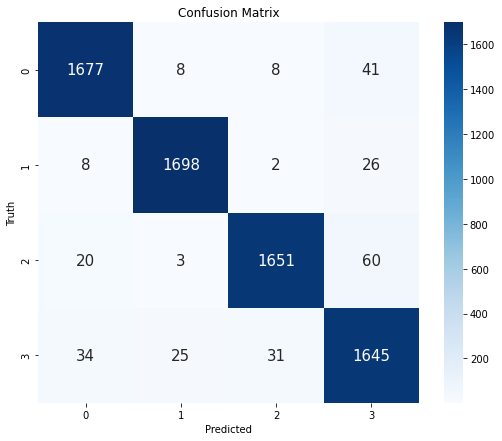

In [72]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()